In [1]:
!pip install minisom

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom

from pylab import bone, pcolor, colorbar, plot, show

In [3]:
dataset = pd.read_csv('../data/Credit_Card_Applications.csv')

In [4]:
X = dataset.iloc[:, :-1].values

In [5]:
y = dataset.iloc[:, -1].values

In [6]:
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [7]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5) 

In [8]:
som.random_weights_init(X)

In [9]:
som.train_random(data = X, num_iteration = 100)

## Visualize the results

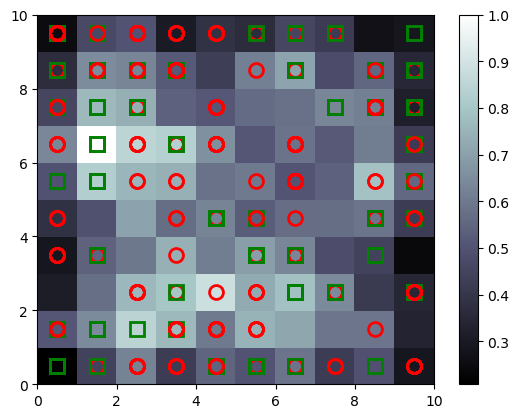

In [10]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, 
         w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10, 
         markeredgewidth = 2 
        )
         
show()

## Finding the frauds

In [11]:
mappings = som.win_map(X)

In [13]:
frauds = mappings[(1, 6)]

In [14]:
frauds = sc.inverse_transform(frauds)

In [17]:
frauds

array([[1.5660390e+07, 0.0000000e+00, 5.8670000e+01, 4.4600000e+00,
        2.0000000e+00, 1.1000000e+01, 8.0000000e+00, 3.0400000e+00,
        1.0000000e+00, 1.0000000e+00, 6.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 4.3000000e+01, 5.6100000e+02],
       [1.5577515e+07, 0.0000000e+00, 6.8670000e+01, 1.5000000e+01,
        2.0000000e+00, 1.0000000e+01, 9.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.4000000e+01, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 3.3770000e+03]])